In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from glob import glob
dataList=glob('.\\data\\*.csv')
dataList

['.\\data\\CUST_ORDER_OUTPUT2.utf8.csv',
 '.\\data\\dvdtrans.csv',
 '.\\data\\genome-scores.csv',
 '.\\data\\genome-tags.csv',
 '.\\data\\links.csv',
 '.\\data\\movies.csv',
 '.\\data\\ratings.csv',
 '.\\data\\tags.csv',
 '.\\data\\VHD_GOODSKIND.csv',
 '.\\data\\구매내역.csv']

In [172]:
df=pd.read_csv('.\\data\\CUST_ORDER_OUTPUT2.utf8.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510470 entries, 0 to 510469
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CUST_SERIAL_NO  510470 non-null  int64 
 1   SEX             510470 non-null  object
 2   AGE             510470 non-null  object
 3   REG_DATE        510470 non-null  object
 4   ORDER_DATE      510470 non-null  object
 5   ORDER_HOUR      510470 non-null  object
 6   ORDER_WEEKDAY   510470 non-null  object
 7   IS_WEEKEND      510470 non-null  object
 8   GOODS_CODE      510470 non-null  int64 
 9   LGROUP          510470 non-null  int64 
 10  MGROUP          510470 non-null  int64 
 11  SGROUP          510470 non-null  int64 
 12  DGROUP          510470 non-null  int64 
 13  GOODS_NAME      510470 non-null  object
 14  PRICE           510470 non-null  int64 
 15  QTY             510470 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 62.3+ MB


In [4]:
def colSpecialChar(df):
  for x in df.columns:
    if df[x].dtype=='object':
      print('--------[%s] data set unique --------' % x)
      print(df[x].unique())

In [5]:
colSpecialChar(df)

--------[SEX] data set unique --------
['F' 'M' '*']
--------[AGE] data set unique --------
[40 60 20 30 50 70 80 90 10 100 '30' '40' '50' '60' '70' '90' '100' '20'
 '80' '*']
--------[REG_DATE] data set unique --------
['2011-07' '2011-08' '2011-09' '2011-10' '2011-11' '2011-12' '2012-01'
 '2012-02' '2012-03' '2012-04' '2012-05' '2012-06' '2012-07' '2012-08'
 '2011-06' '*']
--------[ORDER_DATE] data set unique --------
['2011-11-14' '2012-05-28' '2011-08-30' '2011-07-17' '2011-07-31'
 '2012-06-17' '2011-07-16' '2011-07-30' '2011-09-03' '2011-09-17'
 '2011-09-02' '2011-09-09' '2011-07-15' '2012-07-13' '2012-08-03'
 '2011-08-08' '2011-08-15' '2011-07-14' '2011-07-21' '2011-08-19'
 '2011-09-18' '2011-09-04' '2011-07-24' '2011-08-07' '2011-09-11'
 '2011-11-20' '2011-10-22' '2012-02-04' '2012-01-20' '2012-05-11'
 '2011-08-03' '2011-11-16' '2012-01-25' '2011-08-11' '2012-06-21'
 '2012-07-19' '2012-08-04' '2011-07-29' '2011-08-04' '2011-08-28'
 '2011-10-16' '2011-10-11' '2011-11-08' '2011-10

In [6]:
df1=df[df['SEX']!='*']

In [7]:
df1.head(2)

from datetime import datetime, timedelta
df1['ORDER_DATE'] =pd.to_datetime(df1['ORDER_DATE'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUST_SERIAL_NO  507352 non-null  int64         
 1   SEX             507352 non-null  object        
 2   AGE             507352 non-null  object        
 3   REG_DATE        507352 non-null  object        
 4   ORDER_DATE      507352 non-null  datetime64[ns]
 5   ORDER_HOUR      507352 non-null  object        
 6   ORDER_WEEKDAY   507352 non-null  object        
 7   IS_WEEKEND      507352 non-null  object        
 8   GOODS_CODE      507352 non-null  int64         
 9   LGROUP          507352 non-null  int64         
 10  MGROUP          507352 non-null  int64         
 11  SGROUP          507352 non-null  int64         
 12  DGROUP          507352 non-null  int64         
 13  GOODS_NAME      507352 non-null  object        
 14  PRICE           507352 non-null  int

In [8]:
df.columns
sex1=df1[['ORDER_DATE','SEX','QTY']]

sex1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ORDER_DATE  507352 non-null  datetime64[ns]
 1   SEX         507352 non-null  object        
 2   QTY         507352 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.5+ MB


In [9]:
sex1['month']=sex1['ORDER_DATE'].dt.month
sex2=sex1

sex2

,ORDER_DATE,SEX,QTY,month
0,2011-11-14,F,1,11
1,2012-05-28,F,1,5
2,2012-05-28,F,1,5
3,2011-08-30,F,1,8
4,2011-08-30,F,1,8
...,...,...,...,...
507347,2012-08-07,M,1,8
507348,2012-08-07,M,1,8
507349,2012-08-07,M,1,8
507350,2012-08-07,M,1,8


In [10]:
tmp=sex2.groupby(['SEX', 'month'])['QTY'].sum()
tmp=tmp.unstack()
tmp

month,1,2,3,4,5,6,7,8,9,10,11,12
SEX,,,,,,,,,,,,
F,29851,26487,27142,37208,54211,44600,51767,19478,5168,3949,20347,22722
M,15168,11039,12254,17452,30301,29998,40917,11186,1870,1235,9346,13860


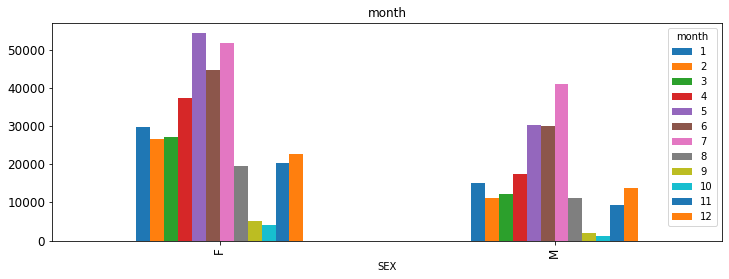

In [11]:
ax = tmp.plot(kind='bar', title='month', figsize=(12, 4), legend=True, fontsize=12)
plt.show()

In [12]:
sex2['changeGender']=['male' if x=='M' else 'female' for x in sex2['SEX']]
sex2['changeGender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
import seaborn as sns

tmp=sex2.groupby(['month', 'SEX'])['QTY'].sum()
tmp1=tmp.unstack()

tmp1

SEX,F,M
month,,
1,29851,15168
2,26487,11039
3,27142,12254
4,37208,17452
5,54211,30301
6,44600,29998
7,51767,40917
8,19478,11186
9,5168,1870


<AxesSubplot:xlabel='month'>

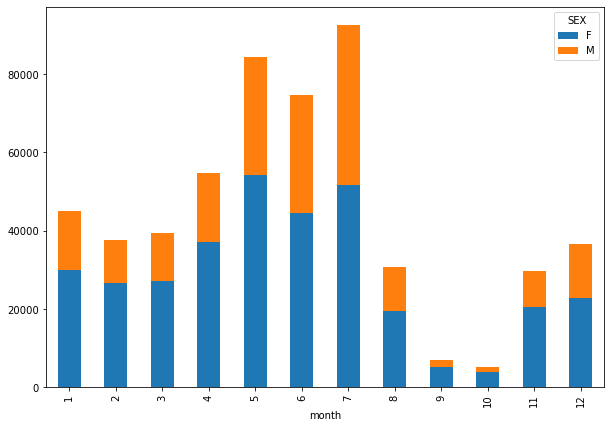

In [14]:
%matplotlib inline
tmp1.plot.bar(stacked=True, figsize=(10,7))

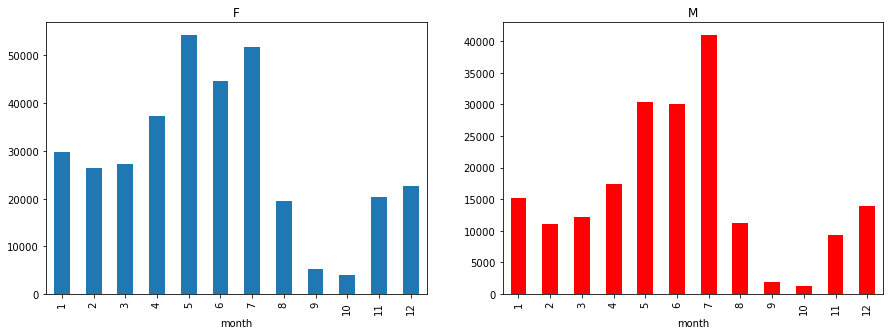

In [15]:
fig=plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
tmp2=tmp1.iloc[:,0]
plt.title(tmp1.columns[0])
tmp2.plot.bar()

plt.subplot(1,2,2)
tmp2=tmp1.iloc[:,1]
plt.title(tmp1.columns[1])
tmp2.plot.bar( color='Red')
#tmp2.plot.bar(stacked=True, color='Red')

plt.show()

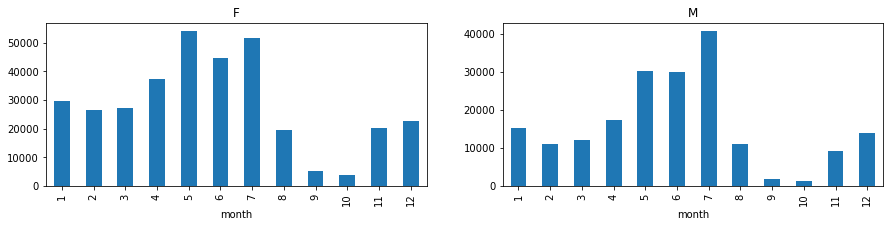

In [16]:
fig=plt.figure(figsize=(15,3))
cnt=0
for x in tmp1.columns:
    
    cnt=cnt+1
    plt.subplot(1,2,cnt)
    plt.title(x)
    tmp1[x].plot.bar()

<AxesSubplot:xlabel='month'>

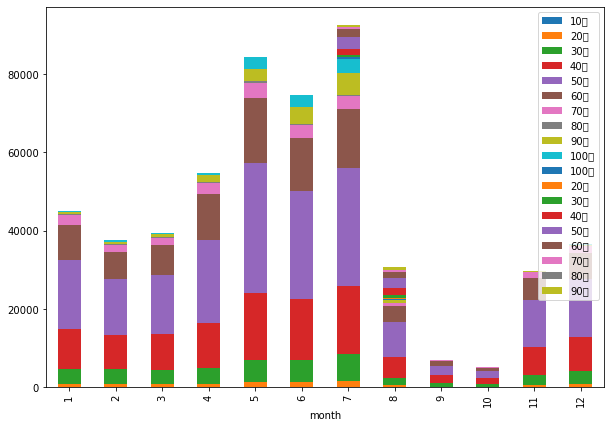

In [21]:
df1.columns
Age1=df1[['ORDER_DATE','AGE','QTY']]
#print(Age1.head())


Age1['month']=Age1['ORDER_DATE'].dt.month
Age2=Age1.copy()

tmp=Age2.groupby(['AGE', 'month'])['QTY'].sum()
tmp1=tmp.unstack()

# 10,20,30,40,50 을 10대, 20대, 30대...로 표현
ageName=[str(x) + "대" for x in tmp1.index ]
#print(ageName)

tmp1.index=ageName


tmp1.T.plot.bar(stacked=True, figsize=(10,7))



<Figure size 21600x720 with 0 Axes>

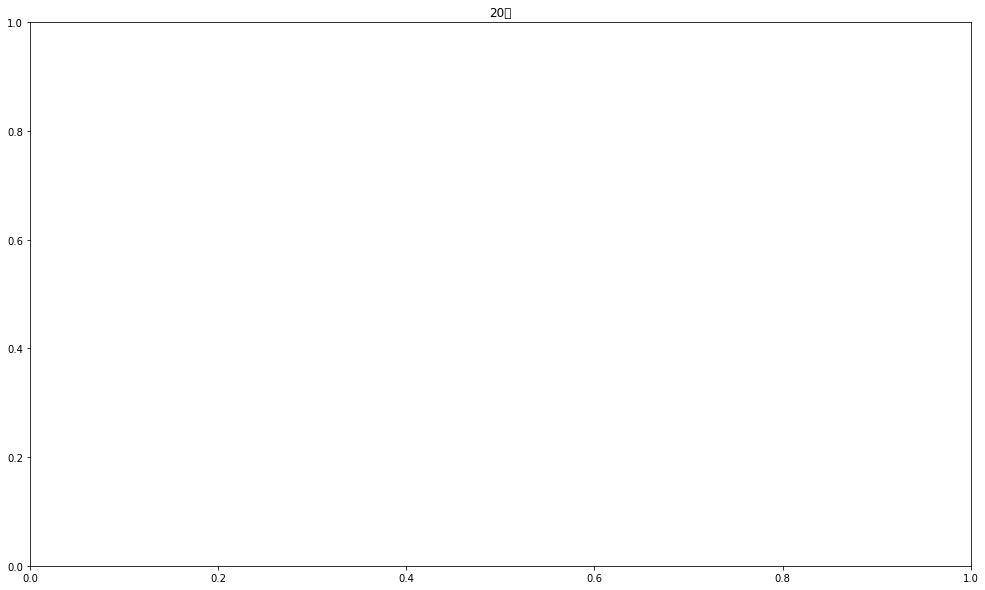

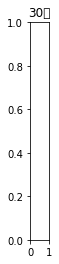

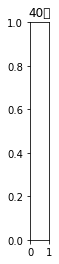

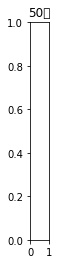

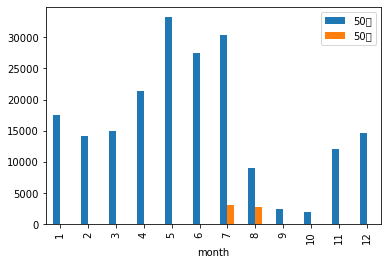

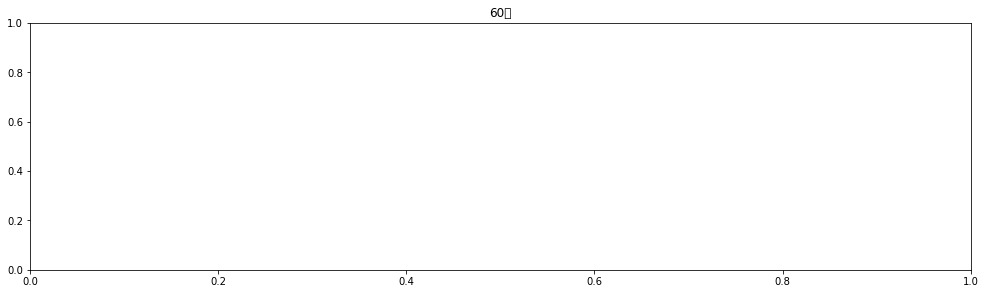

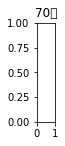

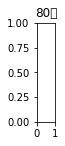

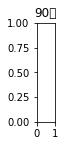

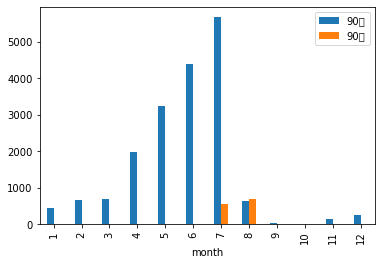

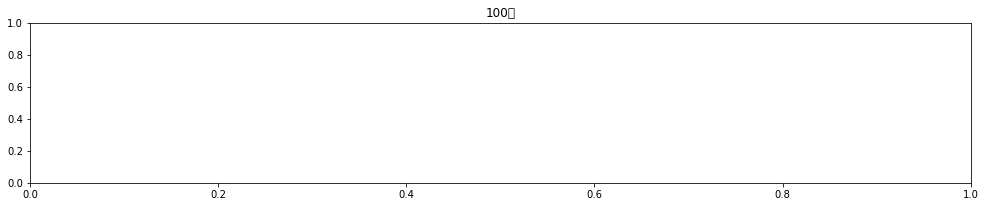

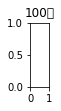

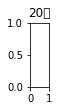

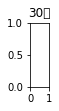

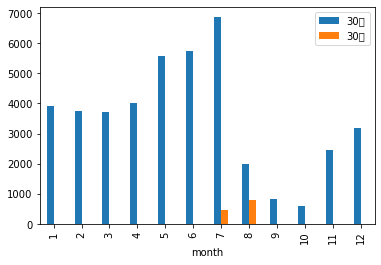

In [22]:
tmp1=tmp1.T


cnt=0

x=tmp1.columns

plt.figure(figsize=(300,10))
for row in range(1,4):
  plt.figure(figsize=(300,10))
  
  for col in range(1,5):
      cnt=cnt+1
      #print(row,15,cnt)
      plt.subplot(row,15,cnt)

      try:
        plt.title(x[cnt])
        tmp1[x[cnt]].plot.bar()
       
      except:
        print('end')

In [23]:
sexage1=df1[['ORDER_DATE','SEX','AGE','QTY']]
sexage1['month']=df1['ORDER_DATE'].dt.month

condition='F'
sexage1Tmp=sexage1[sexage1['SEX']==condition]
sexage2=sexage1Tmp.groupby(['month','SEX','AGE'])['QTY'].sum()
sexage2=sexage2.unstack()

sexage2

,AGE,10,20,30,40,50,60,70,80,90,100
month,SEX,,,,,,,,,,
1,F,NaN,586.0,2898.0,7276.0,12189.0,5407.0,1072.0,90.0,330.0,3.0
2,F,NaN,659.0,2851.0,6649.0,10462.0,4428.0,872.0,53.0,513.0,NaN
3,F,NaN,600.0,2748.0,6596.0,10786.0,4885.0,946.0,60.0,521.0,NaN
4,F,NaN,608.0,2968.0,8692.0,15532.0,7312.0,1261.0,94.0,741.0,NaN
5,F,NaN,907.0,4025.0,12499.0,23688.0,10045.0,1776.0,127.0,1144.0,NaN
6,F,8.0,827.0,3769.0,10591.0,18393.0,7868.0,1369.0,96.0,1662.0,17.0
7,F,NaN,1131.0,4447.0,11851.0,21263.0,8982.0,1570.0,59.0,2462.0,2.0
8,F,NaN,390.0,1746.0,4751.0,8080.0,3333.0,584.0,18.0,575.0,1.0
9,F,NaN,124.0,556.0,1525.0,1841.0,868.0,230.0,10.0,14.0,NaN


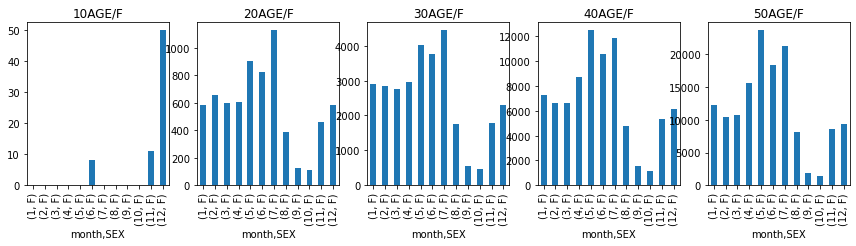

Text(0.5, 1.0, '100AGE/F')

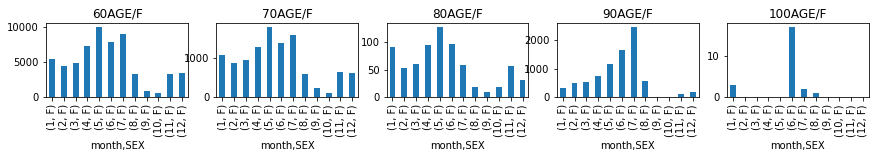

In [24]:
x=sexage2.columns

plt.figure(figsize=(30,3))
cnt=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.show()
plt.figure(figsize=(30,3))

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)

AGE           20      30      40      50      60      70     80      90  \
month SEX                                                                 
1     M    160.0  1031.0  2851.0  5391.0  3685.0  1474.0  204.0   109.0   
2     M    190.0   886.0  2103.0  3725.0  2617.0   901.0  122.0   142.0   
3     M    168.0   960.0  2529.0  4174.0  2772.0   997.0  128.0   178.0   
4     M    212.0  1037.0  2828.0  5809.0  4277.0  1535.0  170.0  1228.0   
5     M    322.0  1549.0  4817.0  9580.0  6382.0  2257.0  257.0  2078.0   
6     M    399.0  1982.0  4941.0  9117.0  5750.0  1992.0  148.0  2724.0   
7     M    501.0  2421.0  5429.0  9086.0  5955.0  1884.0  172.0  3213.0   
8     M     35.0   232.0   552.0   942.0   652.0   180.0   20.0    56.0   
9     M      7.0   264.0   516.0   614.0   363.0    99.0    NaN     3.0   
10    M      7.0   127.0   392.0   445.0   198.0    63.0    NaN     NaN   
11    M    135.0   649.0  1860.0  3480.0  2287.0   766.0   65.0    25.0   
12    M    152.0   891.0 

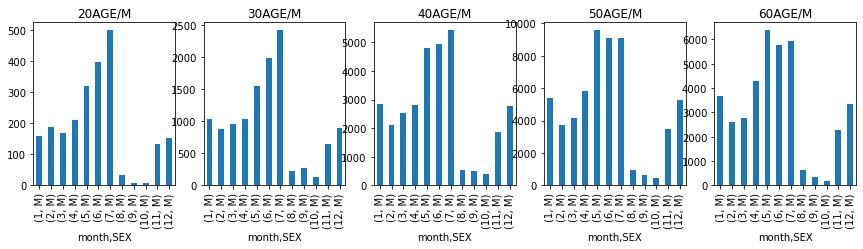

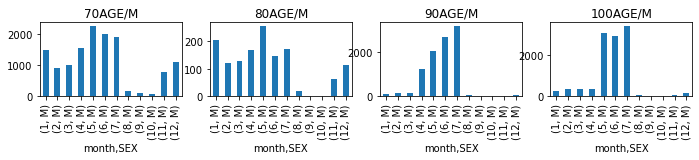

In [25]:
condition='M'
sexage1Tmp=sexage1[sexage1['SEX']=='M']
sexage2=sexage1Tmp.groupby(['month','SEX','AGE'])['QTY'].sum()
sexage2=sexage2.unstack()

print(sexage2)

x=sexage2.columns

#### 여자 출력 
x=sexage2.columns

plt.figure(figsize=(30,3))
cnt=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(1,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1

plt.show()
plt.figure(figsize=(30,3))

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/' + condition)
cnt+=1


plt.subplot(2,10,cnt)
sexage2[x[cnt-1]].plot.bar()
plt.title(str(x[cnt-1]) + 'AGE' + '/'+ condition)
cnt+=1

In [26]:
cust1=df1[['ORDER_DATE','CUST_SERIAL_NO','PRICE']]
cust1['month']=cust1['ORDER_DATE'].dt.month
cust2=cust1
cust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507352 entries, 0 to 507351
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ORDER_DATE      507352 non-null  datetime64[ns]
 1   CUST_SERIAL_NO  507352 non-null  int64         
 2   PRICE           507352 non-null  int64         
 3   month           507352 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 19.4 MB


In [27]:
df2=cust2.groupby(['CUST_SERIAL_NO','month'])['PRICE'].sum()
df2=df2.unstack()
df2.columns=[str(x)+'월' for x in df2.columns]
df2=df2.T
df2

CUST_SERIAL_NO,1000000001,1000000002,1000000004,1000000005,1000000006,1000000007,1000000008,1000000010,1000000011,1000000012,...,1000419400,1000419401,1000419402,1000419403,1000419404,1000419405,1000419406,1000419409,1000419413,1000419414
1월,431900.0,300800.0,NaN,NaN,NaN,NaN,49500.0,NaN,NaN,15400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2월,NaN,154400.0,NaN,NaN,NaN,NaN,138300.0,NaN,63400.0,53300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3월,300200.0,280420.0,NaN,NaN,NaN,NaN,54500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4월,167900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5월,259700.0,117300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6월,NaN,173400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7월,315000.0,900520.0,943000.0,493300.0,566100.0,33300.0,452400.0,1634500.0,406900.0,1861700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8월,1576800.0,1058800.0,132500.0,NaN,63500.0,713000.0,1099600.0,NaN,69400.0,331800.0,...,120900.0,43300.0,43300.0,43300.0,43300.0,0.0,43300.0,43300.0,86600.0,152500.0
9월,156500.0,629500.0,NaN,NaN,24300.0,887100.0,206000.0,63400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10월,443100.0,429500.0,NaN,NaN,NaN,NaN,204000.0,243000.0,432500.0,355900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


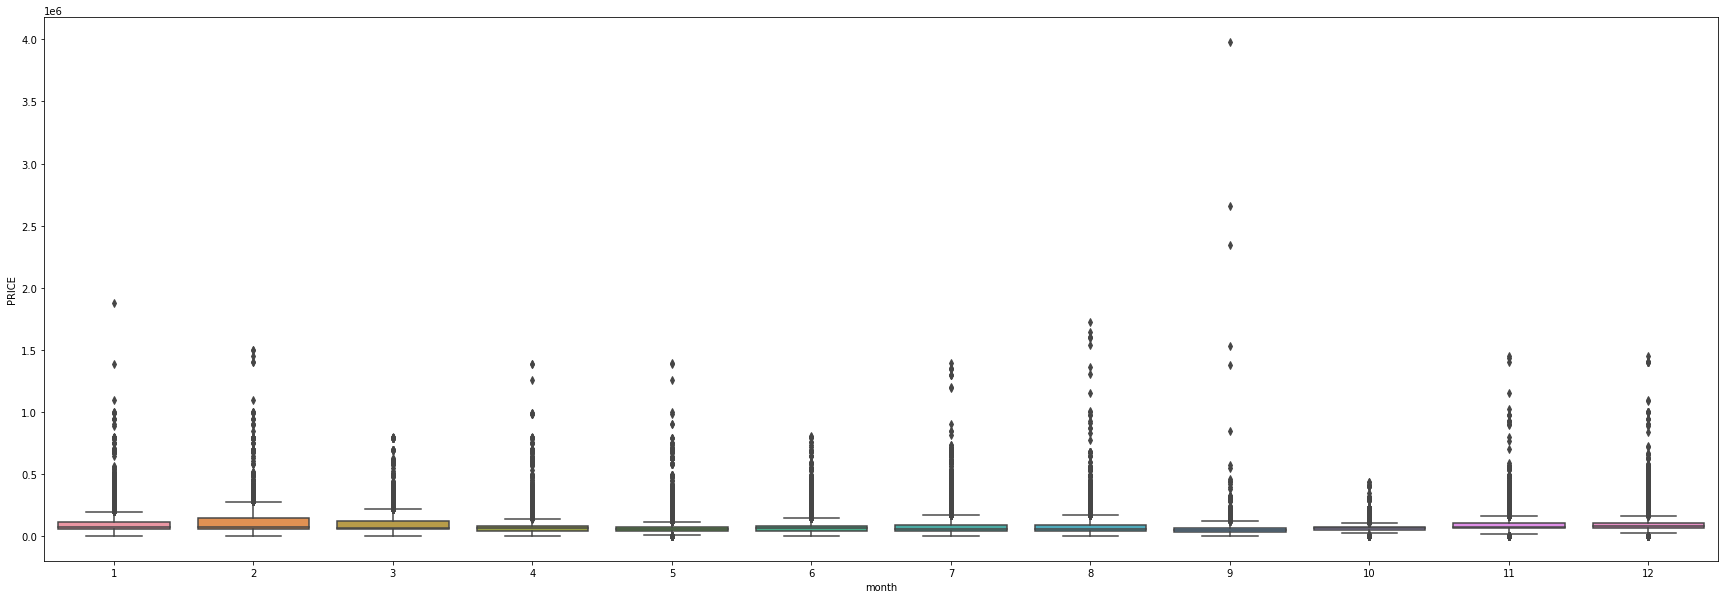

In [28]:
plt.figure(figsize=(30,10))
sns.boxplot(x="month", y="PRICE", data=cust2)
plt.show()

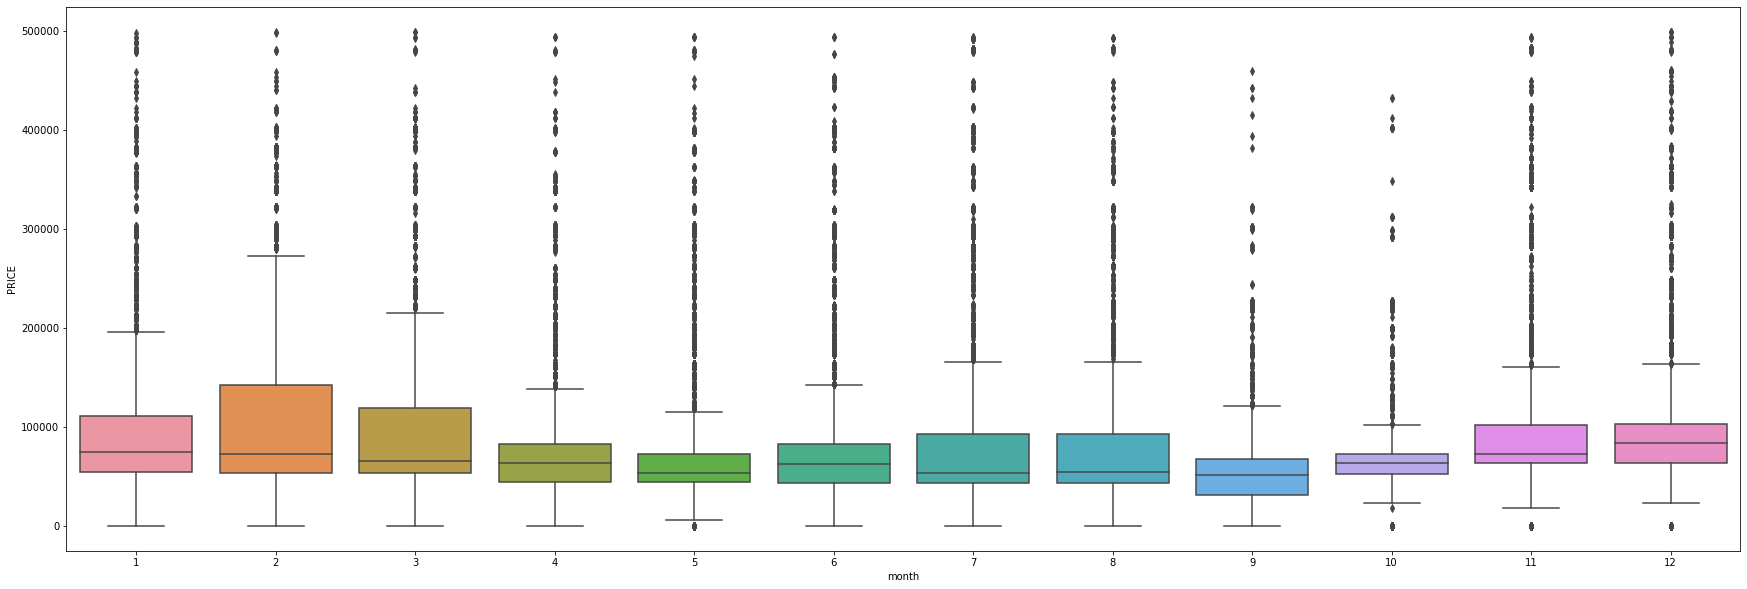

In [29]:
cust4=cust2[cust2['PRICE']<500000]
plt.figure(figsize=(30,10))
sns.boxplot(x="month", y="PRICE", data=cust4)
plt.show()

In [30]:
cust1['weekday']=cust1['ORDER_DATE'].dt.day_name()
day1=cust1
day1

,ORDER_DATE,CUST_SERIAL_NO,PRICE,month,weekday
0,2011-11-14,1000000023,61500,11,Monday
1,2012-05-28,1000000023,42500,5,Monday
2,2012-05-28,1000000023,42500,5,Monday
3,2011-08-30,1000000014,53400,8,Tuesday
4,2011-08-30,1000000014,33400,8,Tuesday
...,...,...,...,...,...
507347,2012-08-07,1000416297,0,8,Tuesday
507348,2012-08-07,1000416219,0,8,Tuesday
507349,2012-08-07,1000416327,0,8,Tuesday
507350,2012-08-07,1000416225,0,8,Tuesday


In [31]:
dgroup1=df1[['LGROUP','MGROUP','SGROUP','DGROUP','QTY']]
print(dgroup1.head())

dgroup1['LMSD_ICODE']=[str(x1)+str(x2)+str(x3)+str(x4) for x1,x2,x3,x4 in zip(df1['LGROUP'],df['MGROUP'],df['SGROUP'],df['DGROUP'])]
dgroup1

   LGROUP  MGROUP  SGROUP  DGROUP  QTY
0      20       2       1       1    1
1      10      10       3       1    1
2      10      10       1       1    1
3      70       2       1       4    1
4      70       2       1      11    1


,LGROUP,MGROUP,SGROUP,DGROUP,QTY,LMSD_ICODE
0,20,2,1,1,1,20211
1,10,10,3,1,1,101031
2,10,10,1,1,1,101011
3,70,2,1,4,1,70214
4,70,2,1,11,1,702111
...,...,...,...,...,...,...
507347,85,4,4,13,1,854413
507348,85,4,4,13,1,854413
507349,85,4,4,13,1,854413
507350,85,4,4,13,1,854413


In [62]:
vhd=pd.read_csv('.\\data\\VHD_GOODSKIND.csv')
vhd.head()

vhd['LMSD_ICODE']=[str(x1)+str(x2)+str(x3)+str(x4) for x1,x2,x3,x4 in zip(vhd['LGROUP'],vhd['MGROUP'],vhd['SGROUP'],vhd['DGROUP'])]
vhd.head()

,LGROUP,MGROUP,SGROUP,DGROUP,LGROUP_NAME,MGROUP_NAME,SGROUP_NAME,DGROUP_NAME,LMSD_CODE,LMSD_ICODE
0,70,2,1,2,식품,신선식품/가공식품,간편/즉석식품,기타 간편/즉석식품,70020102,70212
1,70,2,1,3,식품,신선식품/가공식품,간편/즉석식품,덮밥/덮밥소스,70020103,70213
2,70,2,1,4,식품,신선식품/가공식품,간편/즉석식품,만두/딤섬,70020104,70214
3,70,2,1,5,식품,신선식품/가공식품,간편/즉석식품,분말짜장/카레,70020105,70215
4,70,2,1,6,식품,신선식품/가공식품,간편/즉석식품,샐러드,70020106,70216


In [63]:
dgroup2=pd.merge(dgroup1, vhd, on='LMSD_ICODE')
dgroup2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514475 entries, 0 to 514474
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   LGROUP_x     514475 non-null  int64 
 1   MGROUP_x     514475 non-null  int64 
 2   SGROUP_x     514475 non-null  int64 
 3   DGROUP_x     514475 non-null  int64 
 4   QTY          514475 non-null  int64 
 5   LMSD_ICODE   514475 non-null  object
 6   LGROUP_y     514475 non-null  int64 
 7   MGROUP_y     514475 non-null  int64 
 8   SGROUP_y     514475 non-null  int64 
 9   DGROUP_y     514475 non-null  int64 
 10  LGROUP_NAME  514475 non-null  object
 11  MGROUP_NAME  514475 non-null  object
 12  SGROUP_NAME  514475 non-null  object
 13  DGROUP_NAME  514475 non-null  object
 14  LMSD_CODE    514475 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 62.8+ MB


In [64]:
dgroup3=dgroup2.groupby(['LMSD_ICODE'])['QTY'].sum()
dgroup3

LMSD_ICODE
101011     2612
101015     5361
101017     1255
101024    11854
101031     2226
          ...  
854413     4897
854416     1294
85442        20
85448        33
85451       360
Name: QTY, Length: 274, dtype: int64

In [65]:
dgroup4=dgroup3.sort_values(ascending = False)[:100]
dgroup4

LMSD_ICODE
1014113    27127
50124      23331
80294      21886
50111      19722
1014114    15725
           ...  
10228       1223
501211      1188
70247       1148
30151       1122
501117      1102
Name: QTY, Length: 100, dtype: int64

In [66]:
tmp=pd.DataFrame({'LMSD_ICODE':dgroup4.index,'QTY_SUM':dgroup4})
tmp.index.name='bun'   # 이작업안하면 tmp의 index이름이 LMSD_ICODE여서 자료의 열이름과 같아서 merge가 안됨

## 위의 인덱스 이름이 열 이름과 같으면 아래의 인덱스 리셋도 안됨
tmp.reset_index(inplace=True)
tmp.head()

,bun,LMSD_ICODE,QTY_SUM
0,1014113,1014113,27127
1,50124,50124,23331
2,80294,80294,21886
3,50111,50111,19722
4,1014114,1014114,15725


In [67]:
cnt=0
newindex=[]
lenCnt=len(tmp.iloc[:,0])
for x in range(lenCnt):
    
    newindex.append(cnt)
    cnt+=1


tmp.index=newindex
tmp.head()

,bun,LMSD_ICODE,QTY_SUM
0,1014113,1014113,27127
1,50124,50124,23331
2,80294,80294,21886
3,50111,50111,19722
4,1014114,1014114,15725


In [69]:
dgroup5=pd.merge(tmp,vhd, how='inner')
len(dgroup5)

dgroup6=dgroup5[['DGROUP_NAME','QTY_SUM']]
dgroup6

,DGROUP_NAME,QTY_SUM
0,바지,27127
1,드라이버/전동드릴,23331
2,세차/외장/편의용품,21886
3,건강베개/숙면용품,19722
4,반팔,15725
...,...,...
97,니트/가디건셋트,1223
98,논슬립옷걸이,1188
99,과일 혼합세트,1148
100,2-4단 서랍장/협탁,1122


(-0.5, 399.5, 199.5, -0.5)

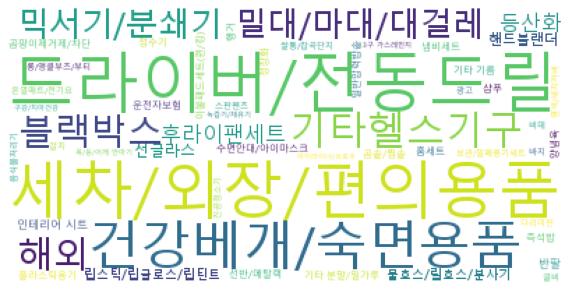

In [108]:
from wordcloud import WordCloud

#dgroup6
data = dict(zip(dgroup6['DGROUP_NAME'].tolist(), dgroup6['QTY_SUM'].tolist()))

#wc = text.set_index("DGROUP_NAME").to_dict()['QTY_SUM']

wordCloud = WordCloud(font_path="C:\\Windows\\Fonts\\malgun.ttf", 
                      max_font_size=60,
                     background_color='white').generate_from_frequencies(data)


plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.axis('off')

In [87]:
len(data)

97

In [109]:
df1['month']=df1['ORDER_DATE'].dt.month
df1['weekday']=df1['ORDER_DATE'].dt.day_name()

analDf=df1[(df1.LGROUP==10) | (df1.LGROUP==20)]
analDf['ID']=[str(x1)+'_'+str(x2)+'_'+ x3 for x1,x2,x3 in zip(analDf['CUST_SERIAL_NO'],analDf['month'],analDf['weekday'])]

analDf['LMSD_ICODE']=[str(x1) +'|'+ str(x2)+ '|'+str(x3) +'|'+ str(x4)  \
 for x1,x2,x3,x4 in zip(analDf['LGROUP'],analDf['MGROUP'],analDf['SGROUP'],analDf['DGROUP'])]

In [110]:
vhd=pd.read_csv('.\\data\\VHD_GOODSKIND.csv')
vhd['LMSD_ICODE']=[str(x1) +'|'+ str(x2)+ '|'+str(x3) +'|'+ str(x4)  \
 for x1,x2,x3,x4 in zip(vhd['LGROUP'],vhd['MGROUP'],vhd['SGROUP'],vhd['DGROUP'])]

In [127]:
vhd

,LGROUP,MGROUP,SGROUP,DGROUP,LGROUP_NAME,MGROUP_NAME,SGROUP_NAME,DGROUP_NAME,LMSD_CODE,LMSD_ICODE
0,70,2,1,2,식품,신선식품/가공식품,간편/즉석식품,기타 간편/즉석식품,70020102,70|2|1|2
1,70,2,1,3,식품,신선식품/가공식품,간편/즉석식품,덮밥/덮밥소스,70020103,70|2|1|3
2,70,2,1,4,식품,신선식품/가공식품,간편/즉석식품,만두/딤섬,70020104,70|2|1|4
3,70,2,1,5,식품,신선식품/가공식품,간편/즉석식품,분말짜장/카레,70020105,70|2|1|5
4,70,2,1,6,식품,신선식품/가공식품,간편/즉석식품,샐러드,70020106,70|2|1|6
...,...,...,...,...,...,...,...,...,...,...
2314,10,1,10,2,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 상의,10011002,10|1|10|2
2315,10,1,10,3,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 하의,10011003,10|1|10|3
2316,10,1,10,4,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 셋트,10011004,10|1|10|4
2317,10,2,1,1,패션/잡화,여성/캐주얼의류,가죽/모피/무스탕,가죽/무스탕,10020101,10|2|1|1


In [178]:
analDf=pd.merge(analDf,vhd)

In [194]:
result_analDf=analDf[['ID','DGROUP_NAME']]
result_analDf

,ID,DGROUP_NAME
0,1000000023_11_Monday,남성세트
1,1000007629_11_Monday,남성세트
2,1000026402_11_Thursday,남성세트
3,1000026419_11_Thursday,남성세트
4,1000026432_11_Thursday,남성세트
...,...,...
143102,1000263980_5_Friday,여성용
143103,1000000037_5_Friday,여성용
143104,1000000037_5_Sunday,여성용
143105,1000000037_5_Sunday,여성용


In [213]:

import pandas as pd
df=pd.read_csv('.\\data\\CUST_ORDER_OUTPUT2.utf8.csv')
df1=df[df['SEX']!='*']

analDf=df1.iloc[:,[0,13]][(df1.LGROUP==10) | (df1.LGROUP==20)]  # 패션잡화와 뷰티
analDf.head()  #사용할 데이터만 남김

,CUST_SERIAL_NO,GOODS_NAME
0,1000000023,더무료체험
1,1000000023,메쉬런닝화 + 슈즈 2종 여성
2,1000000023,메쉬런닝화 + 슈즈 2종 남성
6,1000000002,진주 SET + 사은품 반지 2종
8,1000000002,스니커즈 2종


In [214]:
# CUST_SERIAL_NO를 같은 번호끼리 1,1,1, 2,2,2, 이런식으로 나열하고자 함
bigo=analDf['CUST_SERIAL_NO'][0]
bun=1;bunhoList=[]
for x in analDf['CUST_SERIAL_NO']:
    if x!=bigo:
        bun+=1
    bunhoList.append(bun)
analDf['order_id']=bunhoList
analDf.head()

,CUST_SERIAL_NO,GOODS_NAME,order_id
0,1000000023,더무료체험,1
1,1000000023,메쉬런닝화 + 슈즈 2종 여성,1
2,1000000023,메쉬런닝화 + 슈즈 2종 남성,1
6,1000000002,진주 SET + 사은품 반지 2종,2
8,1000000002,스니커즈 2종,3


In [215]:
# 인덱스값 0,1,2,3,...으로 재설정
analDf=analDf.reset_index(drop=True)
analDf.head()

,CUST_SERIAL_NO,GOODS_NAME,order_id
0,1000000023,더무료체험,1
1,1000000023,메쉬런닝화 + 슈즈 2종 여성,1
2,1000000023,메쉬런닝화 + 슈즈 2종 남성,1
3,1000000002,진주 SET + 사은품 반지 2종,2
4,1000000002,스니커즈 2종,3


In [216]:
# 같은 order번호를 갖고 있는 것끼리 모음
cnt=len(analDf['order_id'].unique())+1

df_tmp=analDf[['order_id','GOODS_NAME']]
df_tmp_arr=[[]for i in range(cnt)]
num=0

for i in df_tmp['GOODS_NAME']:
    df_tmp_arr[df_tmp['order_id'][num]].append(i)
    num+=1

df_tmp_arr[0:6]

[[],
 ['더무료체험', '메쉬런닝화 + 슈즈 2종 여성', '메쉬런닝화 +  슈즈 2종  남성'],
 ['진주 SET + 사은품 반지 2종'],
 ['스니커즈 2종'],
 ['진주 SET + 사은품 반지 2종'],
 ['360도 쿨 브라팬티']]

In [217]:
df_tmp_arr.pop(0)  # 가장상단의 [] 표시를 지우고

# 중복있는 자료를 제거하고자함.
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))
    num+=1
df_tmp_arr[:5]

[['더무료체험', '메쉬런닝화 + 슈즈 2종 여성', '메쉬런닝화 +  슈즈 2종  남성'],
 ['진주 SET + 사은품 반지 2종'],
 ['스니커즈 2종'],
 ['진주 SET + 사은품 반지 2종'],
 ['360도 쿨 브라팬티']]

In [218]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,11종무료체험,1만원 인하 기모본딩 남성바지 3종,1만원세일 루나 화 여성화,2016 골프바지 3종,210수 브라팬티,360도 쿨 브라팬티,3D 드로즈,3D브라팬티 18종,3종핸드백,5번가 EDP 125ml,...,패션 브리프 17종,팩 세트 6개 1set X 2총 12개+립클렌저,퍼블릭 트렁크 패키지 10종세트,펀칭 슬립온 슈즈,펄 마스크,퓨어 선롤러 30ml*4 + 100ml*1 + 롤러리필 2개,핫썸머 쿨웨어 4종남성,핫썸머 쿨웨어 4종여성,헤어속뽕 5P+컬링브러쉬,화이트 셔츠
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [219]:
frequent_itemsets = apriori(df, min_support=0.0001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001628,(11종무료체험)
1,0.001544,(1만원 인하 기모본딩 남성바지 3종)
2,0.001167,(1만원세일 루나 화 여성화)
3,0.006415,(2016 골프바지 3종)
4,0.000300,(360도 쿨 브라팬티)
...,...,...
117,0.000790,(펄 마스크)
118,0.001356,(퓨어 선롤러 30ml*4 + 100ml*1 + 롤러리필 2개)
119,0.001237,(핫썸머 쿨웨어 4종남성)
120,0.000419,(핫썸머 쿨웨어 4종여성)


In [220]:
### 어프라이어리(Apriori) 모듈  사용
from apyori import apriori

# 데이터셋은 위에서 작성한 리스트자료(중복제거하고 같은 번호끼리 모아놓은)
result=(list(apriori(df_tmp_arr, min_support=0.0000001)))

df=pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))


# 2개의 자료에 대한 연관분석을 실시하기 위해 ==2 로 하고
# 이 자료는 대부분 1개의 자료만 나와서 support값을 아주 작게함
df=df[(df['length']==2) & (df['support']>0.000001)].sort_values(by='support',
                                                           ascending=False)
df.head(100)

,items,support,ordered_statistics,length
140,"(더무료체험, 메쉬런닝화 + 슈즈 2종 남성)",0.000007,"[((), (더무료체험, 메쉬런닝화 + 슈즈 2종 남성), 6.987924865...",2
141,"(더무료체험, 메쉬런닝화 + 슈즈 2종 여성)",0.000007,"[((), (더무료체험, 메쉬런닝화 + 슈즈 2종 여성), 6.98792486583...",2
142,"(메쉬런닝화 + 슈즈 2종 여성, 메쉬런닝화 + 슈즈 2종 남성)",0.000007,"[((), (메쉬런닝화 + 슈즈 2종 여성, 메쉬런닝화 + 슈즈 2종 남성), ...",2
143,"(티셔츠 6종남성, 헤어속뽕 5P+컬링브러쉬)",0.000007,"[((), (티셔츠 6종남성, 헤어속뽕 5P+컬링브러쉬), 6.98792486583...",2


In [223]:
import networkx as nx
import numpy as np
G=nx.Graph()
ar=df['items']
G.add_edges_from(ar)

In [224]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
print(nsize)

nsize=200*(nsize-min(nsize)) / (max(nsize)-min(nsize))

[0.2 0.2 0.2 0.2 0.2]


C:\Users\HP\miniconda3\envs\gpu\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


C:\Users\HP\miniconda3\envs\gpu\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


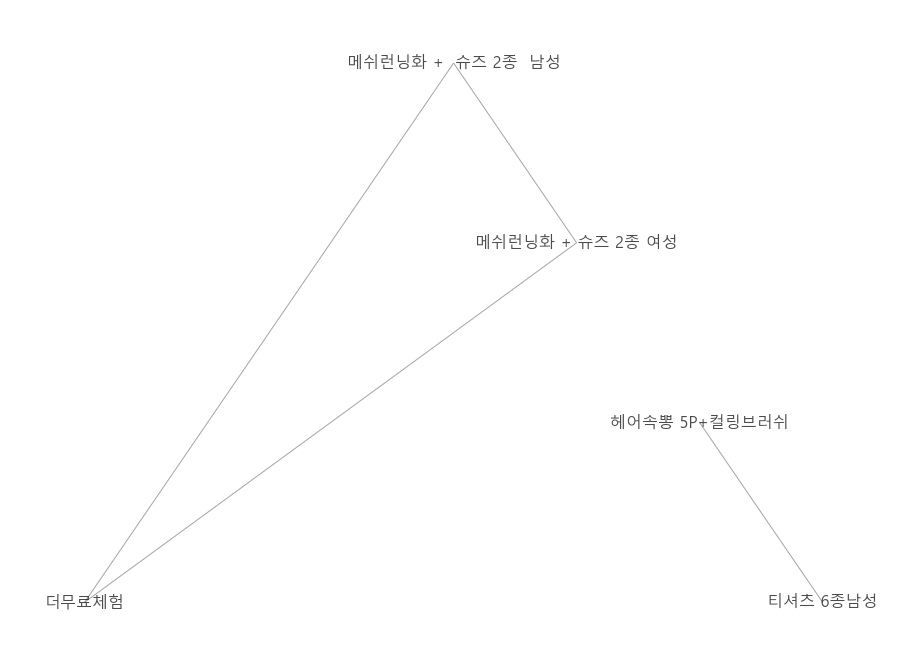

In [225]:
# 네트워크 그래프 제작
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

pos=nx.planar_layout(G)
plt.figure(figsize=(16,12));plt.axis('off')

fname = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
        

nx.draw_networkx(G, font_family=fname,
                 font_size=16,
                 pos=pos,
                 node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)